In [1]:
import pandas as pd
import numpy as np
import nltk

In [4]:
bank_review  = pd.read_excel("E:\data_science_classes\BankReviews.xlsx")
bank_review.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [12]:
X,y=bank_review.Reviews,bank_review.Stars

In [13]:
# Pickling the dataset
import pickle
with open('Review.pickle','wb') as f:
    pickle.dump(x,f)
    
with open('sent.pickle','wb') as f:
    pickle.dump(y,f)

In [14]:
# Unpickling dataset
X_in = open('Review.pickle','rb')
y_in = open('sent.pickle','rb')
X = pickle.load(X_in)
y = pickle.load(y_in)

In [15]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [18]:
corpus[0]

'great job wyndham capital each person was professional and helped us move through our refinance process smoothly thank you '

In [20]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)   

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vipul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


### Creating Tf - Idf model

In [23]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [24]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33245169,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12340384, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1137738 , 0.08430181,
        0.1272345 ]])

### using logistic regression to build the model

In [25]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,
                                              y,
                                              test_size=.3,
                                              random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,logreg.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,logreg.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.881578947368421
train_accuracy:  0.9178470254957507


Text(0.5, 15.0, 'Predicted label')

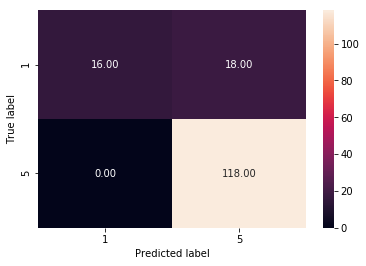

In [28]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            logreg.predict(test_x), [1,5] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [32]:
#Concatenating final prediction with original data set(all obersvations):

pred_stars=pd.DataFrame(logreg.predict(X),columns=['predicted_stars'])
  
testfile = pd.concat([bank_review, pred_stars], axis=1)

testfile.sample(10)

,Date,Stars,Reviews,BankName,predicted_stars
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,5
391,2017-12-24,5,\r\nThey were very helpful. Any questions or c...,Guarenteed Rate Inc,5
447,2017-03-04,5,\r\nI first inquired about a loan with Brent (...,North American Savings Bank,5
27,2017-09-12,5,Comments: To begin my wife and I were at the p...,North American Savings Bank,5
477,2016-12-05,5,\r\nI was hesitant to use a non-local mortgage...,North American Savings Bank,5
11,2016-02-06,5,usten Butler brought the humanity and connecti...,Wyndham Capital Mortgage,5
341,2016-04-28,5,\r\nAbsolutely the best service! I used them t...,Guarenteed Rate Inc,5
360,2016-08-09,5,\r\nOur last home purchase was a stressful and...,Guarenteed Rate Inc,5
29,2017-05-02,5,NASB was amazing to work with! The pre-approva...,North American Savings Bank,5
339,2016-08-02,5,\r\nEthan and Peter worked tirelessly to close...,LoanSnap,5
